In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer

In [12]:
#stationID = 'USC00131319' #Cedar Rapids, IA
#stationID = 'USW00003947' #Kansas City, MO 
#stationID = 'USW00093822' #Springfield, IL 

filename = 'Data/merged_dly_tmax_tmin_2012_USW00093822.csv'
df_data = pd.read_csv(filename, index_col=0)

In [13]:
df_data.head()

,Day_of_Year,Tmax_dly,Tmin_dly,Tmax_norm,Tmax_std,Tmin_norm,Tmin_std
DATE,,,,,,,
2012-01-01,1,48.0,32.0,34.9,12.7,19.3,13.2
2012-01-02,2,32.0,19.0,34.8,12.6,19.2,13.2
2012-01-03,3,34.0,11.0,34.7,12.6,19.1,13.2
2012-01-04,4,48.0,30.0,34.6,12.6,19.0,13.2
2012-01-05,5,59.0,27.0,34.6,12.6,19.0,13.1


In [14]:
df_data.tail()

,Day_of_Year,Tmax_dly,Tmin_dly,Tmax_norm,Tmax_std,Tmin_norm,Tmin_std
DATE,,,,,,,
2012-12-27,362,31.0,24.0,35.4,12.6,19.9,13.0
2012-12-28,363,34.0,28.0,35.3,12.7,19.8,13.1
2012-12-29,364,31.0,18.0,35.1,12.7,19.7,13.1
2012-12-30,365,42.0,18.0,35.0,12.7,19.6,13.2
2012-12-31,366,36.0,22.0,34.9,12.7,19.4,13.2


In [15]:
#Check for missing data
print(df_data.isna().sum())

Day_of_Year    0
Tmax_dly       0
Tmin_dly       0
Tmax_norm      0
Tmax_std       0
Tmin_norm      0
Tmin_std       0
dtype: int64


In [16]:
start_date = '2012-04-01'
end_date = '2012-11-30'
df_sliced = df_data.loc[start_date:end_date]

In [17]:
temps_max = df_sliced[['Tmax_dly']].values 
temps_min = df_sliced[['Tmin_dly']].values

In [18]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)

#Tmax anomalies 
iso_forest.fit(temps_max)

anomaly_scores_Tmax = iso_forest.score_samples(temps_max)
df_sliced['Tmax_anomaly_sc'] = anomaly_scores_Tmax
df_sliced['Tmax_anomaly_pr'] = iso_forest.predict(temps_max)

#Tmin anomalies
iso_forest.fit(temps_min)

anomaly_scores_Tmin = iso_forest.score_samples(temps_min)
df_sliced['Tmin_anomaly_sc'] = anomaly_scores_Tmin
df_sliced['Tmin_anomaly_pr'] = iso_forest.predict(temps_min)

#Extract anomalies for plotting  
df_anomalies_Tmax = df_sliced[df_sliced['Tmax_anomaly_pr'] == -1]
df_anomalies_Tmin = df_sliced[df_sliced['Tmin_anomaly_pr'] == -1]

#df_sliced['Tmax_anomaly'] = iso_forest.fit_predict(temps_max)
#df_sliced['Tmin_anomaly'] = iso_forest.fit_predict(temps_min)
#df_sliced['Tmax_anomaly_sc'] = iso_forest.score_samples(temps_max)
#df_sliced['Tmin_anomaly_sc'] = iso_forest.score_samples(temps_min)

#Tmax_anomalies = df_sliced[df_sliced['Tmax_anomaly'] == -1]
#Tmin_anomalies = df_sliced[df_sliced['Tmin_anomaly'] == -1]

/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_49917/4271023637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced['Tmax_anomaly_sc'] = anomaly_scores_Tmax
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_49917/4271023637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced['Tmax_anomaly_pr'] = iso_forest.predict(temps_max)
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_49917/4271023637.py:14: SettingWithCopyWarning: 
A value is trying to be set on a cop

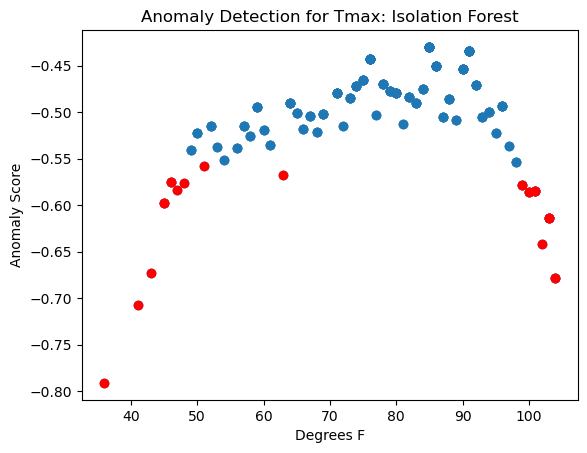

In [25]:
plt.scatter(df_sliced['Tmax_dly'], df_sliced['Tmax_anomaly_sc'])
plt.scatter(df_anomalies_Tmax['Tmax_dly'], df_anomalies_Tmax['Tmax_anomaly_sc'], color='red', label='Anomaly')

plt.xlabel('Degrees F')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection for Tmax: Isolation Forest')

plt.show()

In [20]:
print(len(df_sliced['Tmax_dly']))

244


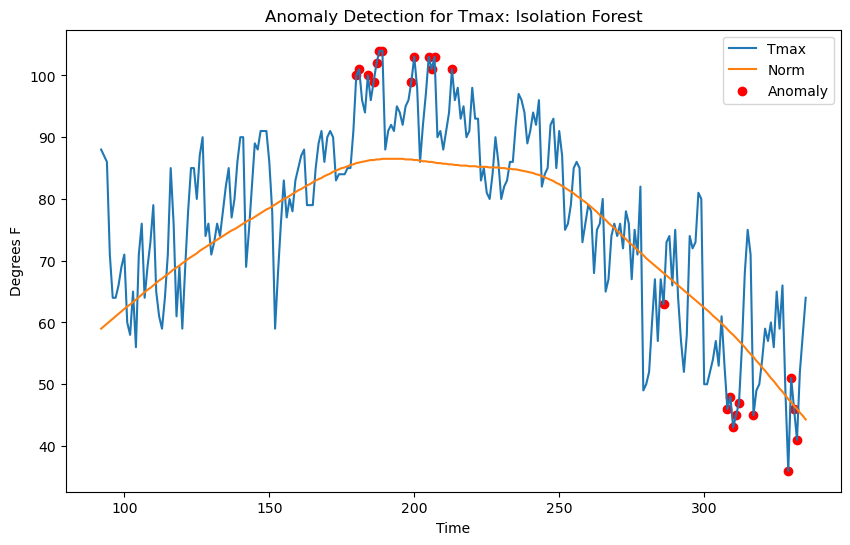

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_dly'], label='Tmax')
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_norm'], label='Norm')
plt.scatter(df_anomalies_Tmax['Day_of_Year'], df_anomalies_Tmax['Tmax_dly'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Degrees F')
plt.title('Anomaly Detection for Tmax: Isolation Forest')

plt.legend()
plt.show()

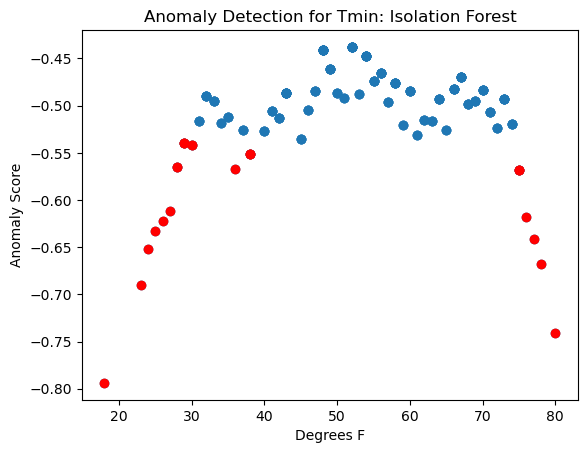

In [24]:
plt.scatter(df_sliced['Tmin_dly'], df_sliced['Tmin_anomaly_sc'])
plt.scatter(df_anomalies_Tmin['Tmin_dly'], df_anomalies_Tmin['Tmin_anomaly_sc'], color='red', label='Anomaly')

plt.xlabel('Degrees F')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection for Tmin: Isolation Forest')

plt.show()

In [ ]:
#threshold = np.percentile(anomaly_scores, 10)
#y_pred = np.where(anomaly_scores < threshold, -1, 1)

#df_sliced['Tmax_anomaly_th'] = y_pred 
#df_sliced['Tmax_anomaly_pr'] = iso_forest.predict(temps_max)

#Tmax_anomalies = df_sliced[df_sliced['Tmax_anomaly_th'] == -1]
#Tmax_anomalies_pr = df_sliced[df_sliced['Tmax_anomaly_pr'] == -1]

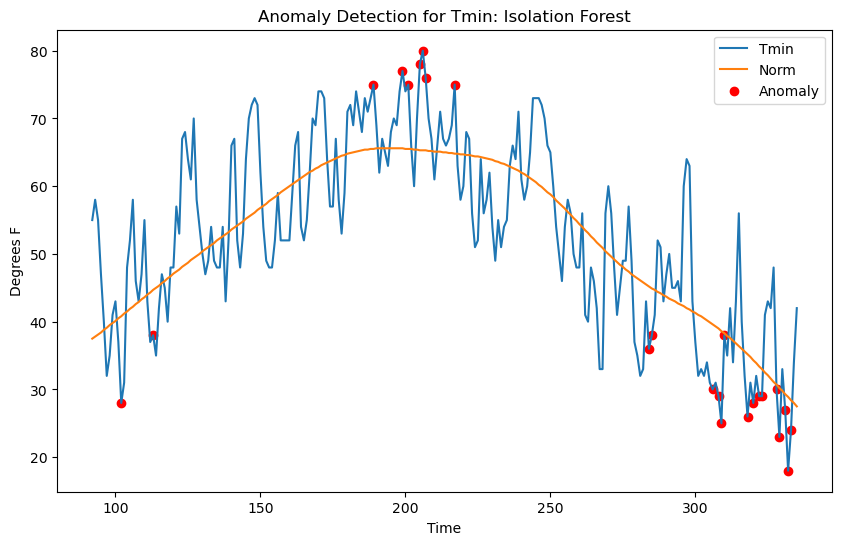

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_dly'], label='Tmin')
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_norm'], label='Norm')
plt.scatter(df_anomalies_Tmin['Day_of_Year'], df_anomalies_Tmin['Tmin_dly'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Degrees F')
plt.title('Anomaly Detection for Tmin: Isolation Forest')

plt.legend()
plt.show()

In [ ]:
#plt.scatter(df_sliced['Tmax_dly'], df_sliced['Tmax_anomaly_sc'])
#plt.scatter(Tmax_anomalies_pr['Tmax_dly'], Tmax_anomalies_pr['Tmax_anomaly_sc'], color='red', label='Anomaly')

In [ ]:
#plt.hist(anomaly_scores, bins=25)
#plt.axvline(threshold, color='r', linestyle='--')
#plt.title('Distribution of Anomaly Scores')
#plt.xlabel('Anomaly Score')
#plt.ylabel('Frequency')
#plt.show()

In [ ]:
def custom_anomaly_scorer(estimator, X):
    
    #Get the anomaly scores: lower scores are more anomalous 
    anomaly_scores = estimator.score_samples(X)
    
    mean_anomaly_score = np.mean(anomaly_scores)
    print(mean_anomaly_score)
    
    #Minimize the mean anomaly score
    return np.mean(anomaly_scores)

In [ ]:
def custom_spread_scorer(estimator, X):
    
    anomaly_scores = estimator.score_samples(X)
    
    std_anomaly_score = np.std(anomaly_scores)
    print(std_anomaly_score)
    
    return np.std(anomaly_scores)

In [ ]:
custom_scorer = make_scorer(custom_anomaly_scorer, greater_is_better=False)

tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [50, 100, 200],
    'contamination': [0.05, 0.1, 0.2]
}

isolation_forest = IsolationForest(random_state=42)

grid_search = GridSearchCV(estimator=isolation_forest, \
                           param_grid=param_grid, \
                           cv=tscv, \
                           scoring=custom_spread_scorer)

#grid_search = GridSearchCV(estimator=isolation_forest, \
#                           param_grid=param_grid, \
#                           cv=tscv)

grid_search.fit(temps_max)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [ ]:
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)
df_sliced['Tmax_anomaly'] = iso_forest.fit_predict(temps_max)
df_sliced['Tmin_anomaly'] = iso_forest.fit_predict(temps_min)

In [ ]:
Tmax_anomalies = df_sliced[df_sliced['Tmax_anomaly'] == -1]
Tmin_anomalies = df_sliced[df_sliced['Tmin_anomaly'] == -1]

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_dly'], label='Tmax')
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_norm'], label='Norm')
plt.scatter(Tmax_anomalies['Day_of_Year'], Tmax_anomalies['Tmax_dly'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Degrees F')
plt.title('Anomaly Detection for Tmax (April-November)')

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_dly'], label='Tmin')
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_norm'], label='Norm')
plt.scatter(Tmin_anomalies['Day_of_Year'], Tmin_anomalies['Tmin_dly'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Degrees F')
plt.title('Anomaly Detection for Tmin (April-November)')

plt.legend()
plt.show()